# Case 21.8 Catalog Cross-Selling

> (c) 2019 Galit Shmueli, Peter C. Bruce, Peter Gedeck 
>
> Case study included in
>
> _Data Mining for Business Analytics: Concepts, Techniques, and Applications in Python_ (First Edition) 
> Galit Shmueli, Peter C. Bruce, Peter Gedeck, and Nitin R. Patel. 2019.

In [1]:
%matplotlib inline

from pathlib import Path
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pylab as plt

DATA = Path('.').resolve().parent / 'data'

# Assignment
Using the dataset `CatalogCrossSell.csv`, perform an association rules
analysis, and comment on the results.  Your discussion should
provide interpretations in English of the meanings of the various
output statistics (lift ratio, confidence, support) and include a
very rough estimate (precise calculations are not necessary) of the
extent to which this will help Exeter make an informed choice about
which catalog to cross-promote to a purchaser.

# Load the data

In [2]:
data = pd.read_csv(DATA / 'CatalogCrossSell.csv')
data = data.set_index('Customer Number')
data = data.rename(columns={n: n.replace(' Division', '') for n in data.columns})
data.head()

,Clothing,Housewares,Health Products,Automotive,Personal Electronics,Computers,Garden,Novelty Gift,Jewelry
Customer Number,,,,,,,,,
11569,0,1,1,1,1,0,0,1,0
13714,0,1,1,1,1,0,1,1,1
46391,0,1,1,1,1,0,1,1,1
67264,0,0,1,1,1,0,1,1,0
67363,0,0,1,0,1,0,1,1,0


# Item-frequency plot

Clothing                0.033013
Housewares              0.393557
Health Products         1.000000
Automotive              0.134854
Personal Electronics    0.467387
Computers               0.046819
Garden                  0.272109
Novelty Gift            0.227491
Jewelry                 0.356943
dtype: float64


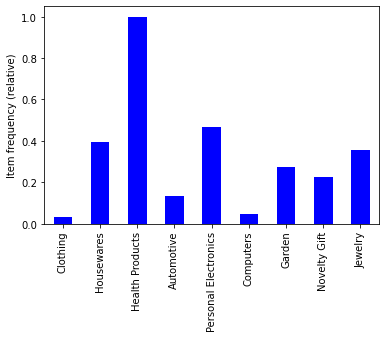

In [3]:
# determine item frequencies
itemFrequency = data.sum(axis=0) / len(data)
print(itemFrequency)

# and plot as histogram
ax = itemFrequency.plot.bar(color='blue')
plt.ylabel('Item frequency (relative)')
plt.show()

# Association rules analysis

In [4]:
# create frequent itemsets
itemsets = apriori(data, min_support=0.1, use_colnames=True)

# and convert into rules
rules = association_rules(itemsets, metric='confidence', min_threshold=0.5)
print(f'Number of rules {len(rules)}')

(rules.sort_values(by=['lift'], ascending=False)
      .drop(columns=['antecedent support', 'consequent support', 'conviction']))#.head(10)

Number of rules 54


,antecedents,consequents,support,confidence,lift,leverage
46,"(Novelty Gift, Housewares)","(Personal Electronics, Health Products)",0.107843,0.799703,1.711009,0.044814
44,"(Housewares, Novelty Gift, Health Products)",(Personal Electronics),0.107843,0.799703,1.711009,0.044814
26,"(Novelty Gift, Housewares)",(Personal Electronics),0.107843,0.799703,1.711009,0.044814
27,"(Jewelry, Personal Electronics)",(Housewares),0.132053,0.668693,1.699099,0.054333
51,"(Jewelry, Personal Electronics)","(Housewares, Health Products)",0.132053,0.668693,1.699099,0.054333
47,"(Jewelry, Personal Electronics, Health Products)",(Housewares),0.132053,0.668693,1.699099,0.054333
25,"(Personal Electronics, Novelty Gift)",(Housewares),0.107843,0.637870,1.620780,0.041305
45,"(Personal Electronics, Novelty Gift)","(Housewares, Health Products)",0.107843,0.637870,1.620780,0.041305
42,"(Personal Electronics, Novelty Gift, Health Pr...",(Housewares),0.107843,0.637870,1.620780,0.041305
35,(Novelty Gift),"(Personal Electronics, Health Products)",0.169068,0.743184,1.590082,0.062741


The first rule in the table can be interpreted as follows: If the customer purchases from 
both the Housewares and Novelty catalog, they will also purchase from Personal
Electronics. This rule has support of 0.108, or 10.8%. This is the number of people
who bought from all three catalogs. It has confidence of 80%, meaning that
80% of the people who bought from Housewares and Novelty also bought from Personal
Electronics. Its lift ratio is 1.71, meaning that if we cross-sell Personal Electronics to a
person who bought from Housewares and Novelty, they are 71% more likely to buy
something than if we cross-sell Personal Electronics to a random customer.

The second and third rule have identical metrics to the first rule. It is likely that these are all based on the same set of customers. Indeed, if we filter the data by those customers who bought from Housewares and Novelty Gift, we get the following item frequencies:

In [5]:
data[(data['Housewares'] == 1) & (data['Novelty Gift'] == 1)].sum(axis=0)

Clothing                 51
Housewares              674
Health Products         674
Automotive              177
Personal Electronics    539
Computers                59
Garden                  344
Novelty Gift            674
Jewelry                 377
dtype: int64

All of these 674 customers also bought from Health Products. Health Products is the most selling category (see item frequency). In fact, the item frequency for Health Products is 1 which means that every customer has purchased from this catalog. This makes rules all rules that include Health Products (like 2 and 3) redundant.

It makes sense to repeat the analysis excluding information from "Health Products". 

# Association rules analysis without "Health Products"

In [6]:
# create frequent itemsets
itemsets = apriori(data.drop(columns=['Health Products']), min_support=0.1, use_colnames=True)

# and convert into rules
rules = association_rules(itemsets, metric='confidence', min_threshold=0.5)
print(f'Number of rules {len(rules)}')

(rules.sort_values(by=['lift'], ascending=False)
      .drop(columns=['antecedent support', 'consequent support', 'conviction']))

Number of rules 12


,antecedents,consequents,support,confidence,lift,leverage
8,"(Novelty Gift, Housewares)",(Personal Electronics),0.107843,0.799703,1.711009,0.044814
9,"(Jewelry, Personal Electronics)",(Housewares),0.132053,0.668693,1.699099,0.054333
7,"(Personal Electronics, Novelty Gift)",(Housewares),0.107843,0.637870,1.620780,0.041305
5,(Novelty Gift),(Personal Electronics),0.169068,0.743184,1.590082,0.062741
11,"(Personal Electronics, Housewares)",(Jewelry),0.132053,0.560748,1.570974,0.047995
2,(Novelty Gift),(Housewares),0.134854,0.592788,1.506230,0.045323
10,"(Jewelry, Housewares)",(Personal Electronics),0.132053,0.677618,1.449801,0.040969
3,(Jewelry),(Housewares),0.194878,0.545964,1.387254,0.054400
4,(Garden),(Personal Electronics),0.163265,0.600000,1.283733,0.036085
0,(Personal Electronics),(Housewares),0.235494,0.503853,1.280252,0.051551


There are now fewer rules. The first rule is identical to the rules 1 to 3 in our initial analysis. The same is true for rule 2 that corresponds to rules 4 to 6 above. 

We can see that a critical analysis of the results can lead to a revised approach that leads to simpler, yet identical results.